# HW2 - Data Analysis
## Dvir Yerushalmi    201271251
## Elad Lavie            - 304819600

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import kstest
import pandas as pd

## Q1

In [14]:

ITERATIONS = 1000
SAMPLES = 100
def in_confidence_bound(x):
    F_x =  np.sum(samples < x)/100.
    real_cdf = norm.cdf(x)
    return F_x < min(1,real_cdf + confidence_bound_eps) and F_x > max(0,real_cdf- confidence_bound_eps)

confidence_bound_eps = np.sqrt(np.log(2/0.05)/(2*SAMPLES))
succ_rate_acc = 0
max_success = 0
min_success = SAMPLES
for i in range(ITERATIONS):
    samples = np.random.randn(SAMPLES)
    success_sum = np.sum(np.array(map(in_confidence_bound,samples)))
    succ_rate_acc += success_sum
    if success_sum > max_success:
        max_success = success_sum
        max_success_samples = samples.copy()
    if success_sum < min_success:
        min_success = success_sum
        min_success_samples = samples.copy()
avg_succ_rate = float(succ_rate_acc)/(ITERATIONS*SAMPLES)
max_succ_rate = float(max_success)/SAMPLES
min_succ_rate = float(min_success)/SAMPLES
print("The avg success rate is {}\nThe max success rate is {}\nThe min success_rate is {}".format(
     avg_succ_rate,max_succ_rate,min_succ_rate))


The avg success rate is 0.98719
The max success rate is 0.99
The min success_rate is 0.67


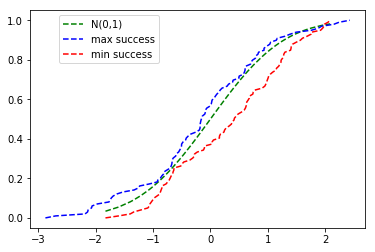

In [15]:
x_max = sorted(max_success_samples)
y_max = np.linspace(0,1,100)

x_min = sorted(min_success_samples)
y_min = np.linspace(0,1,100)

y_real = norm.cdf(x_min)


graphs = plt.plot(x_min,y_real,'g--',x_max,y_max,'b--',x_min,y_min,'r--')
_ = plt.legend(graphs,['N(0,1)','max success','min success'],bbox_to_anchor=(0.4, 1))

# Q2

In [4]:
samsung_csv = pd.read_csv("samsungData.csv")

# Q3

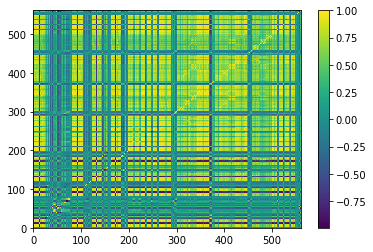

In [5]:
def ret_correlation(X,Y):
    normalized_x = X - np.mean(X)
    normalized_y = Y- np.mean(Y)
    numerator = np.sum(normalized_x*normalized_y)
    denom = np.sqrt(np.sum(normalized_x**2))*np.sqrt(np.sum(normalized_y**2))
    return numerator/denom

csv_relevant =  samsung_csv.iloc[:,1:-2]
correlation_mat = csv_relevant.corr().as_matrix()

heatmap = plt.pcolor(correlation_mat)
_ = plt.colorbar()

## Q4
__ explanation for the code __:
return_mask_matrix will return ones matrix the same size of the correlation matrix but with zeros at (i,j) iif column i is identical to column j. at those places we expect that the correlation will be 1, therfore the maximal, even though we want to find the max correlation betweeen two different columns, therfore, multyplication of that matrix with the curr matrix, will zero all the (i,j) where column i is identical to colunmn j.

In [6]:
def return_mask_matrix(csv):
    size = csv.shape[1]
    mask_matrix = np.ones((size,size),dtype=np.int8)
    csv = csv.as_matrix()
    for i in range(size):
        for j in range(size):
            if i== j or np.any(csv[:,i] == csv[:,j]):
                mask_matrix[i,j] = 0
    return mask_matrix

def find_most_correlated(csv, correlation_mat_of_csv,mask_matrix):
    shape = correlation_mat_of_csv.shape
    assert(shape == mask_matrix.shape)
    updated_correlation_mat = correlation_mat_of_csv * mask_matrix
    flattend_index = np.argmax(updated_correlation_mat)
    most_correlated = np.unravel_index(flattend_index,shape)
    return (csv.columns[most_correlated[0]], csv.columns[most_correlated[1]])

mask_matrix = return_mask_matrix(csv_relevant)
most_correlated = find_most_correlated(csv_relevant,correlation_mat,mask_matrix)
print("the most correlated (but not identical) columns are: {}".format(most_correlated))

the most correlated (but not identical) columns are: ('tBodyAcc-std()-Y', 'fBodyAcc-std()-Y')


below we can see that those columns are almost identical, as the normalized MSE between them is 0.0029.
this is why they are very correlated.


In [7]:
def difference_ratio(x,y):
    x = x.as_matrix()
    y = y.as_matrix()
    return np.sum(np.abs((x-y)/x))

c = difference_ratio(csv_relevant[most_correlated[0]],csv_relevant[most_correlated[1]])
print "the difference ratio between the correlated columns is:{}".format(c)

the difference ratio between the correlated columns is:6243.29417585


## Q5 + Q6

the most correlated columns of class 'standing' are: ('fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-1,24.1')
the difference ratio between the correlated columns is:0.0


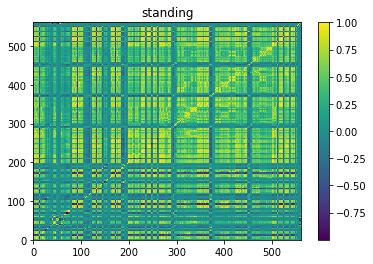

the most correlated columns of class 'walkdown' are: ('tBodyAcc-energy()-Y', 'fBodyAcc-energy()-Y')
the difference ratio between the correlated columns is:0.0


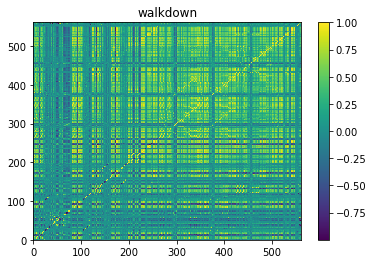

the most correlated columns of class 'sitting' are: ('fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-1,24.1')
the difference ratio between the correlated columns is:0.0


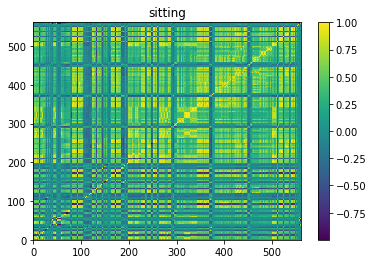

the most correlated columns of class 'walkup' are: ('tGravityAcc-mean()-X', 'tGravityAcc-energy()-X')
the difference ratio between the correlated columns is:0.0


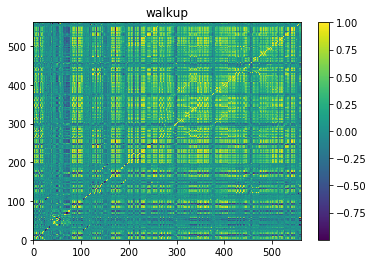

the most correlated columns of class 'laying' are: ('fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-1,24.1')
the difference ratio between the correlated columns is:0.0


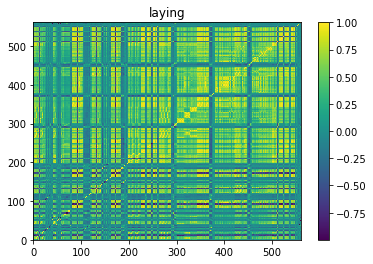

the most correlated columns of class 'walk' are: ('tBodyAcc-energy()-Z', 'fBodyAcc-energy()-Z')
the difference ratio between the correlated columns is:0.0


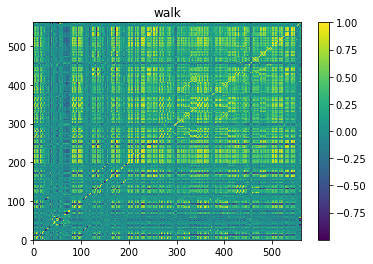

In [8]:
subjects = set(samsung_csv['activity'])
for subject in subjects:
    csv_class = csv_relevant[samsung_csv['activity'] == subject]
    correlation_mat = csv_class.corr().as_matrix()
    plt.figure()
    plt.title(subject)
    heatmap = plt.pcolor(correlation_mat)
    _ = plt.colorbar()
    most_correlated = find_most_correlated(csv_class,correlation_mat,mask_matrix)
    print("the most correlated columns of class '{}' are: {}".format(subject,most_correlated))
    c = difference_ratio(csv_relevant[most_correlated[0]],csv_relevant[most_correlated[0]])
    print "the difference ratio between the correlated columns is:{}".format(c)
    plt.show()

In [9]:
samsung_csv[['fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-1,24.1','activity']].head()

,"fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,24.1",activity
0,-0.999682,-0.999687,standing
1,-0.999474,-0.999444,standing
2,-0.999108,-0.999126,standing
3,-0.999673,-0.999692,standing
4,-0.999610,-0.999621,standing


__explanation__: above we see the first 5 rows of the most corrrelated in the 'standing' class. we see that they are very similar, thefore they correlate very close to 1. the difference ratio shows that that all the columns are almost the same (the difference ratio is zero for all the classes)

# Q7
Due to time constraint, we make a bootstrap only for the first 40 features in the csv, the number of iterations will be 500, which ill be shown in Q8, as sufficiant.

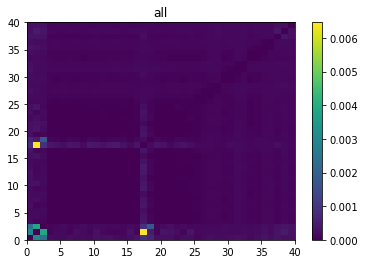

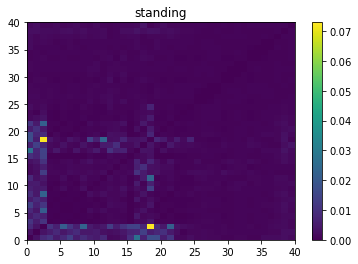

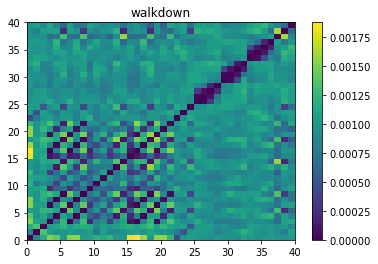

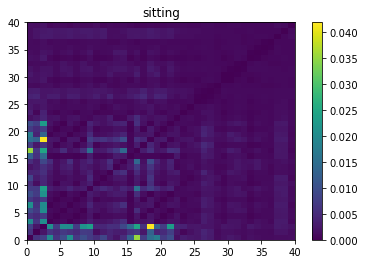

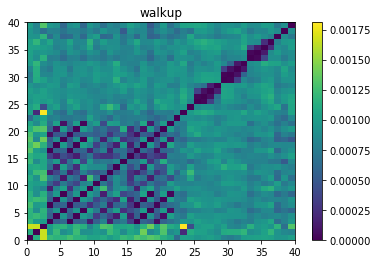

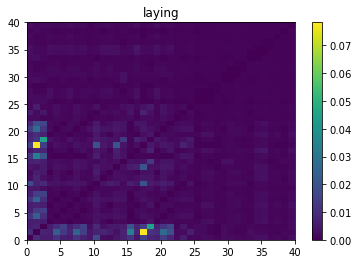

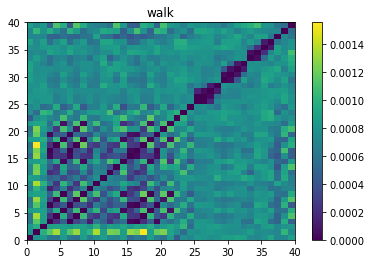

In [10]:
def bootstrap(number_of_iterations,csv):
    curr_mat_shape = csv.shape[1]
    samples_amount = csv.shape[0]
    curr_data = np.ones((curr_mat_shape,curr_mat_shape,number_of_iterations))
    for i in range(number_of_iterations):
        new_bootstrap_csv = csv.iloc[ np.random.randint(low=0, high=samples_amount, size=samples_amount)]
        curr_data[:,:,i] = new_bootstrap_csv.corr().as_matrix()
    return np.var(curr_data,axis=2)


def plot_bootstrap(var_mat,title):
    plt.figure()
    plt.title(title)
    heatmap = plt.pcolor(var_mat)
    _ = plt.colorbar()
    plt.show()

csv_first_40_features = csv_relevant[range(40)]
activities = dict()
activities['all'] = bootstrap(500,csv_first_40_features)
plot_bootstrap(activities['all'],'all')
for activity in set(samsung_csv['activity']):
    csv_activity = csv_first_40_features[samsung_csv['activity'] == activity]
    activities[activity] = bootstrap(500,csv_activity)
    plot_bootstrap(activities[activity],activity)

we will show that for the correlation between column 1 and 213 the estimated variance of this correlation estimator, converges after 500 samples.

## Q8
As you can see, we get a clear convergence at 1000 samples

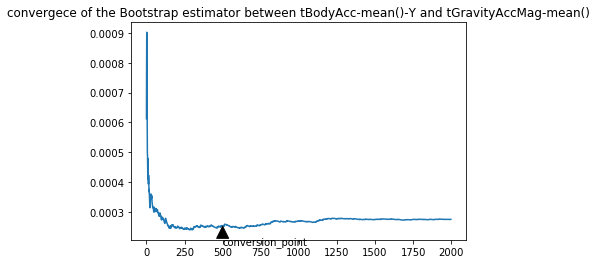

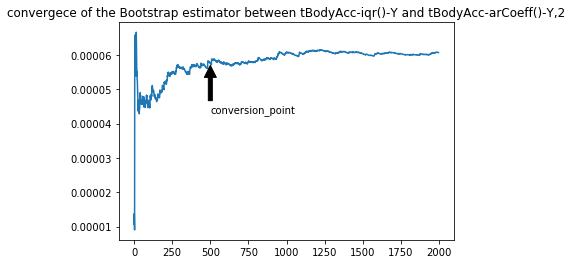

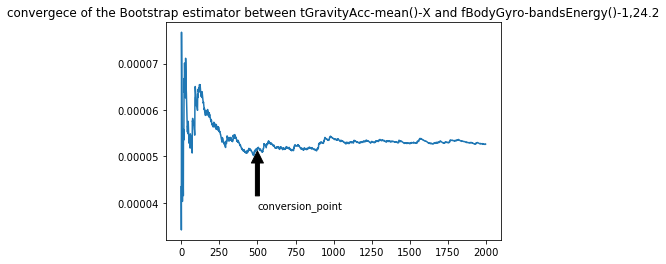

In [11]:
sampleVectorsNum = 2000

def calcBootstrapCorrList((i,j),csv):
    corrList = list()
    for k in range(0,sampleVectorsNum):
        rndList = np.random.randint(low=0, high=csv.shape[0], size=csv.shape[0])
        X = csv.iloc[rndList,i].as_matrix()
        Y = csv.iloc[rndList,j].as_matrix()
        corrList.append(ret_correlation(X,Y))
    return corrList

for (i,j) in [(1,213),(20,30),(40,500)]:
    corrList = calcBootstrapCorrList((i,j),csv_relevant)
    varList = []
    for k in range(1,sampleVectorsNum):
        varList.append(np.var(corrList[0:k]))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(varList[1:])
    plt.title("convergece of the Bootstrap estimator between {} and {}"
              .format(csv_relevant.columns[i],csv_relevant.columns[j]))
    ax.annotate('conversion_point', xy=(500,varList[500]), xytext=(500,varList[500]*0.75),
            arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.show()

# Q9
we have all the empirical calculated variances, which was calculated by bootstrap, we know by the big numbers rule, that that this variance will behave like a gaussian with sigma^2 as the calculated variance, so the epsilon (for the CI) shold be 1.96 times the calculated variance. 

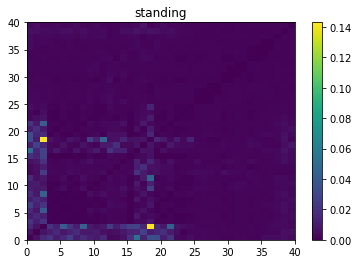

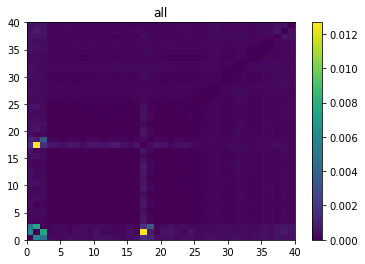

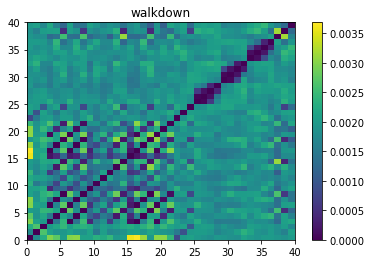

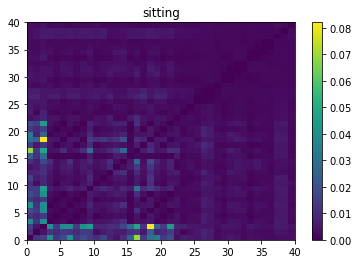

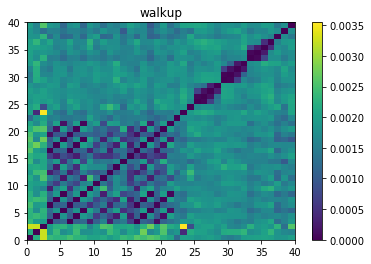

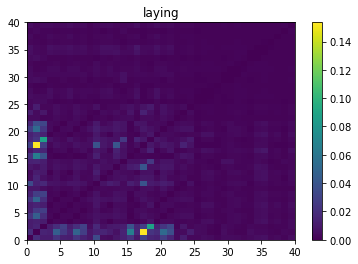

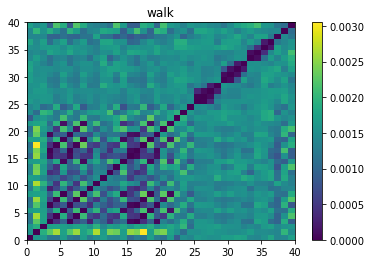

In [12]:
for activity_name,var_mat in  activities.items():
    plot_bootstrap(var_mat*1.96,activity_name)

# Q10

the best fit for the gaussian distribution is tBodyAcc-entropy()-Y which
has the smallest p_value according to the Kolmogorov-Smirnov test


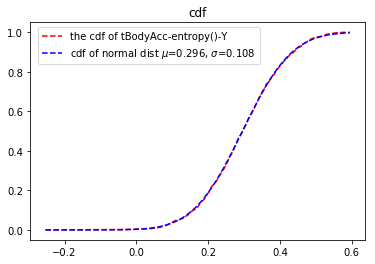

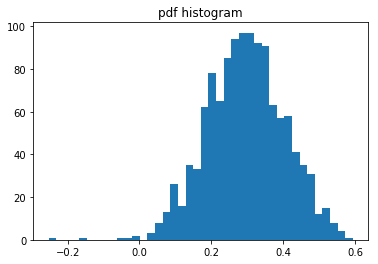

In [13]:
walk_csv = csv_relevant[samsung_csv['activity'] == 'walk']
matrix = walk_csv.as_matrix()

smallest_p_value = 1
smallest_index = -1
best_mu = 0
best_std = 0
for i in range(matrix.shape[1]):
    samples = matrix[:,i]
    mu = np.mean(samples)
    sigma = np.std(samples)
    (test_statistic,_) = kstest(samples, 'norm', args=(mu,sigma))
    if test_statistic < smallest_p_value:
        smallest_p_value = test_statistic
        smallest_index = i
        best_mu = mu
        best_std = sigma
print("""the best fit for the gaussian distribution is {} which
has the smallest p_value according to the Kolmogorov-Smirnov test""".format(walk_csv.columns[smallest_index]))
best_fit = matrix[:,smallest_index]
best_fit.sort()
plt.figure()
expected_cdf = norm.cdf(best_fit,loc= best_mu,scale = best_std)
graphs = plt.plot(best_fit,np.linspace(0,1,len(best_fit)),'r--',best_fit,expected_cdf,'b--')
title1 = "the cdf of {}".format(walk_csv.columns[smallest_index])
title2 = r"cdf of normal dist $\mu$={:.3}, $\sigma$={:.3}".format(best_mu,best_std)
plt.legend(graphs,[title1,title2],bbox_to_anchor = (0.7,1))
plt.title("cdf")
plt.figure()
plt.hist(best_fit,bins=40)
_ = plt.title("pdf histogram")